In [1]:
# The normal imports
import numpy as np
from numpy.random import randn
import pandas as pd

# Import the stats library from numpy
from scipy import stats

# These are the plotting modules and libraries we'll use:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Command so that plots appear in the iPython Notebook
%matplotlib inline

In [2]:
dataset = randn(25)


(0.0, 1.0)

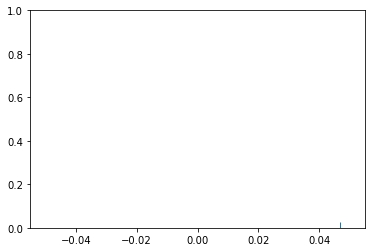

In [3]:

sns.rugplot(dataset)
plt.ylim(0,1)

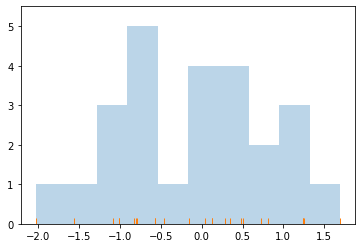

In [4]:
plt.hist(dataset,alpha=0.3)
sns.rugplot(dataset)

(0.0, 1.0)

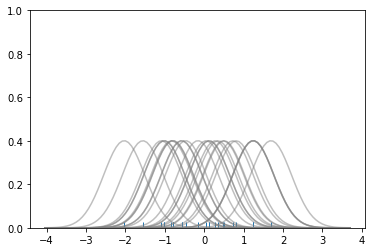

In [6]:

sns.rugplot(dataset)
x_min = dataset.min() - 2
x_max = dataset.max() + 2

x_axis = np.linspace(x_min,x_max,100)

bandwidth = ((4*dataset.std()**5) / (3*len(dataset)))**0.2

kernel_list = []

for data_point in dataset:
    #Create a kernel for each point and append it to the kernel_list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * 0.4
    
    plt.plot(x_axis,kernel,color="grey",alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the basis functions')

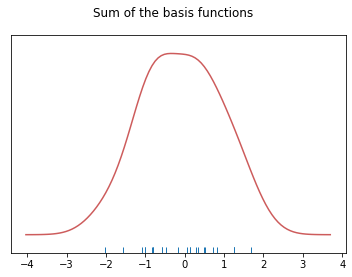

In [7]:
sum_of_kde = np.sum(kernel_list,axis=0)

fig = plt.plot(x_axis,sum_of_kde,color='indianred')

sns.rugplot(dataset)

plt.yticks([])

plt.suptitle("Sum of the basis functions")

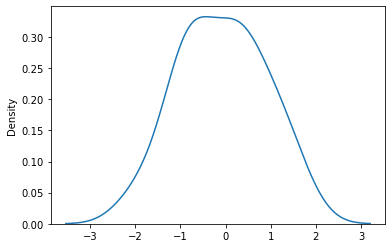

In [8]:
sns.kdeplot(dataset)


C:\Users\Tayyab Nadeem\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\Tayyab Nadeem\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.75 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\Tayyab Nadeem\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.0 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWar

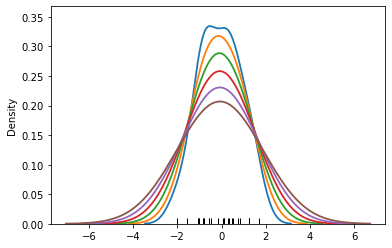

In [9]:
sns.rugplot(dataset,color='black')

for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset, bw=bw, lw=1.8, label=bw)

In [10]:

# More info on types
url = 'http://en.wikipedia.org/wiki/Kernel_(statistics)'

C:\Users\Tayyab Nadeem\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\distributions.py:1668: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
C:\Users\Tayyab Nadeem\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\distributions.py:1668: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
C:\Users\Tayyab Nadeem\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\distributions.py:1668: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
C:\Users\Tayyab Nadeem\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\distributions.py:1668: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
C:\Users\Tayyab Nadeem\AppData\Local\Programs\Python\Python38-32\lib\sit

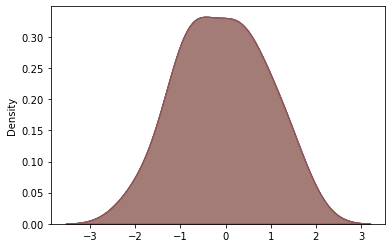

In [11]:
kernel_options = ['biw','cos','epa','gau','tri','triw']

for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern, shade=True)

C:\Users\Tayyab Nadeem\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\distributions.py:1649: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


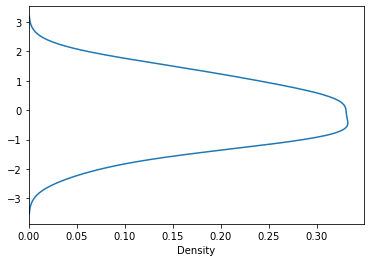

In [12]:

sns.kdeplot(dataset,vertical=True)

In [13]:
# URL for info on CDF
url = 'http://en.wikipedia.org/wiki/Cumulative_distribution_function'

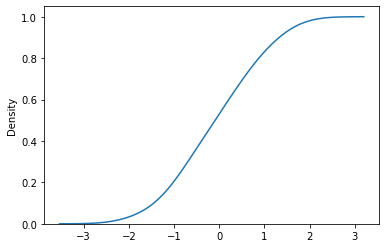

In [14]:
sns.kdeplot(dataset,cumulative = True)

C:\Users\Tayyab Nadeem\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


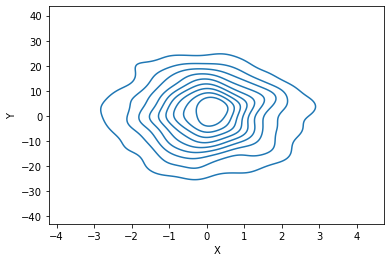

In [30]:
mean = [0,0]

cov = [[1,0],[0,100]]

dataset2 = np.random.multivariate_normal(mean,cov,1000)

dframe = pd.DataFrame(dataset2,columns=['X','Y'])


sns.kdeplot(dframe.X,dframe.Y)


C:\Users\Tayyab Nadeem\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


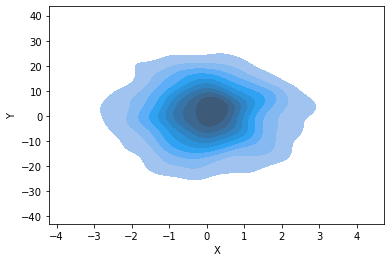

In [31]:
sns.kdeplot(dframe.X,dframe.Y,shade=True)


C:\Users\Tayyab Nadeem\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


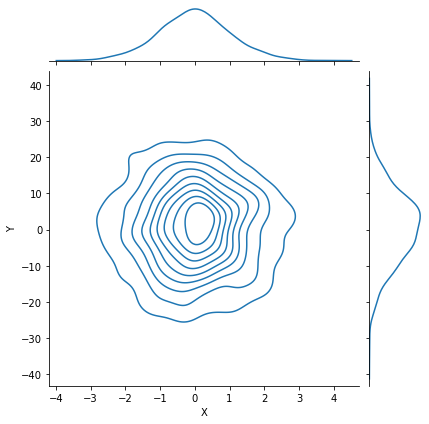

In [35]:
sns.jointplot('X','Y',dframe,kind='kde')

